### open api로 양파 데이터만 불러오기

In [1]:
import requests
import pandas as pd

# URL과 파라미터 정의
url = "http://www.kamis.or.kr/service/price/xml.do?action=periodProductList"

params = {
    "p_cert_key": "20f546f2-715d-4524-89ae-f933d5460bb9",   # 실제 인증 키로 대체
    "p_cert_id": "dkgus731",     # 실제 요청 ID로 대체
    "p_returntype": "json",          # json 또는 xml로 설정
    "p_startday": "2003-06-01",      # 조회 시작 날짜 설정
    "p_endday": "2024-06-24",        # 조회 종료 날짜 설정
    "p_convert_kg_yn": "Y",          # kg 단위 환산 여부 (Y 또는 N)
    "p_itemcategorycode": "100",     # 부류 코드 설정
    "p_itemcode": "245",             # 품목 코드 설정, 양파는 245
    "p_kindcode": "00",              # 품종 코드 설정
    "p_productrankcode": "04",       # 등급 코드 설정
    "p_countrycode": "",             # 지역 코드 설정
    "p_productclscode": "02"           # 구분 ( 01:소매, 02:도매, default:02 )
}

# GET 요청 보내기
response = requests.get(url, params=params)

# 요청이 성공했는지 확인
if response.status_code == 200:
    # 응답을 파싱 (json 형식일 경우)
    data = response.json()

    # 'item' 리스트를 데이터프레임으로 변환
    items = data.get('data', {}).get('item', [])
    df = pd.DataFrame(items)

    # 데이터프레임 전체 출력 설정
    pd.set_option('display.max_rows', None)   # 모든 행 출력
    pd.set_option('display.max_columns', None) # 모든 열 출력
    pd.set_option('display.width', None)      # 가로 너비 설정 없음
    pd.set_option('display.max_colwidth', None) # 컬럼 최대 너비 설정 없음

    # 데이터프레임 출력
    print(df)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

     itemname kindname countyname marketname  yyyy regday  price
0          []       []         평균         []  2023  08/16  1,463
1          []       []         평균         []  2023  08/17  1,459
2          []       []         평균         []  2023  08/18  1,449
3          []       []         평균         []  2023  08/21  1,447
4          []       []         평균         []  2023  08/22  1,429
5          []       []         평균         []  2023  08/23  1,413
6          []       []         평균         []  2023  08/24  1,421
7          []       []         평균         []  2023  08/25  1,419
8          []       []         평균         []  2023  08/28  1,423
9          []       []         평균         []  2023  08/29  1,423
10         []       []         평균         []  2023  08/30  1,423
11         []       []         평균         []  2023  08/31  1,409
12         []       []         평균         []  2023  09/01  1,409
13         []       []         평균         []  2023  09/04  1,432
14         []       []   

In [6]:
new_df = df[df['countyname'] == '대구']

### 데이터 전처리

float 형식으로 바꾸기 위해 ',' 없애고 type 변경

In [7]:
import pandas as pd
import numpy as np

# 예제 DataFrame
# new_df = pd.DataFrame({'price': ['1,000', '2,500', '-', '3,750']})

# 먼저 ','를 제거하고, '-'는 NaN으로 변환합니다.
new_df['price'] = new_df['price'].replace('-', np.nan)
new_df['price'] = new_df['price'].str.replace(',', '')

# 이제 'price' 열을 float으로 변환합니다. 이때 NaN 값은 변환 과정에서 자동으로 처리됩니다.
new_df['price'] = new_df['price'].astype(float)

# 결과 확인
print(new_df)

     itemname kindname countyname marketname  yyyy regday   price
832        양파  양파(1kg)         대구       북부도매  2023  08/16  1387.0
833        양파  양파(1kg)         대구       북부도매  2023  08/17  1387.0
834        양파  양파(1kg)         대구       북부도매  2023  08/18  1373.0
835        양파  양파(1kg)         대구       북부도매  2023  08/21  1373.0
836        양파  양파(1kg)         대구       북부도매  2023  08/22  1373.0
837        양파  양파(1kg)         대구       북부도매  2023  08/23  1373.0
838        양파  양파(1kg)         대구       북부도매  2023  08/24  1373.0
839        양파  양파(1kg)         대구       북부도매  2023  08/25  1373.0
840        양파  양파(1kg)         대구       북부도매  2023  08/28  1360.0
841        양파  양파(1kg)         대구       북부도매  2023  08/29  1360.0
842        양파  양파(1kg)         대구       북부도매  2023  08/30  1360.0
843        양파  양파(1kg)         대구       북부도매  2023  08/31  1360.0
844        양파  양파(1kg)         대구       북부도매  2023  09/01  1360.0
845        양파  양파(1kg)         대구       북부도매  2023  09/04  1413.0
846       

<ipython-input-7-09c7ad5b705c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = new_df['price'].replace('-', np.nan)
<ipython-input-7-09c7ad5b705c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = new_df['price'].str.replace(',', '')
<ipython-input-7-09c7ad5b705c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [8]:
import pandas as pd

# regday 열에서 '/' 지우기
new_df['regday'] = new_df['regday'].str.replace('/', '').astype(str)

<ipython-input-8-3aa6d8c028f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['regday'] = new_df['regday'].str.replace('/', '').astype(str)


In [9]:
# yyyy와 regday 열을 합쳐서 새로운 date 열 생성
new_df['date'] = new_df['yyyy'].astype(str) + new_df['regday'].astype(str)
new_df['date'] = pd.to_datetime(new_df['date'])

<ipython-input-9-527d29e169b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['yyyy'].astype(str) + new_df['regday'].astype(str)
<ipython-input-9-527d29e169b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['date'])


In [10]:
#기존 yyyy, regday 열 삭제
new_df = new_df.drop(['yyyy', 'regday'], axis=1)

In [11]:
new_df.head()

,itemname,kindname,countyname,marketname,price,date
832,양파,양파(1kg),대구,북부도매,1387.0,2023-08-16
833,양파,양파(1kg),대구,북부도매,1387.0,2023-08-17
834,양파,양파(1kg),대구,북부도매,1373.0,2023-08-18
835,양파,양파(1kg),대구,북부도매,1373.0,2023-08-21
836,양파,양파(1kg),대구,북부도매,1373.0,2023-08-22


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 832 to 1039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   itemname    208 non-null    object        
 1   kindname    208 non-null    object        
 2   countyname  208 non-null    object        
 3   marketname  208 non-null    object        
 4   price       207 non-null    float64       
 5   date        208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.4+ KB


In [13]:
from google.colab import files
uploaded = files.upload()

Saving NanumGothic-Regular.ttf to NanumGothic-Regular.ttf


In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 업로드한 폰트 파일 경로
font_path = '/content/NanumGothic-Regular.ttf'

# FontProperties 객체 생성
fontprop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib 설정
plt.rc('font', family='NanumGothic')  # 전체 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 설정

Root Mean Squared Error: 108.00944917063075


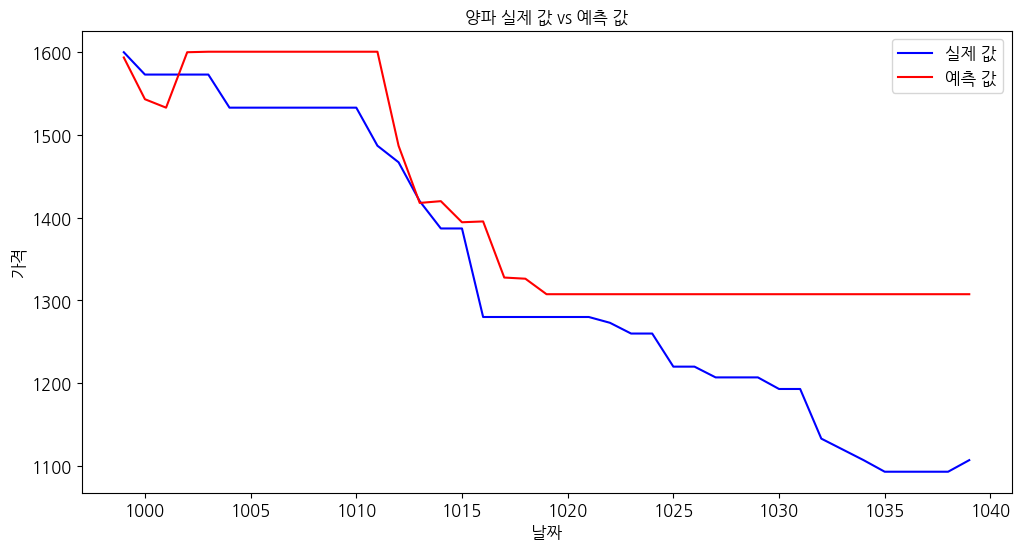

예측된 미래 값: 1307.54541015625


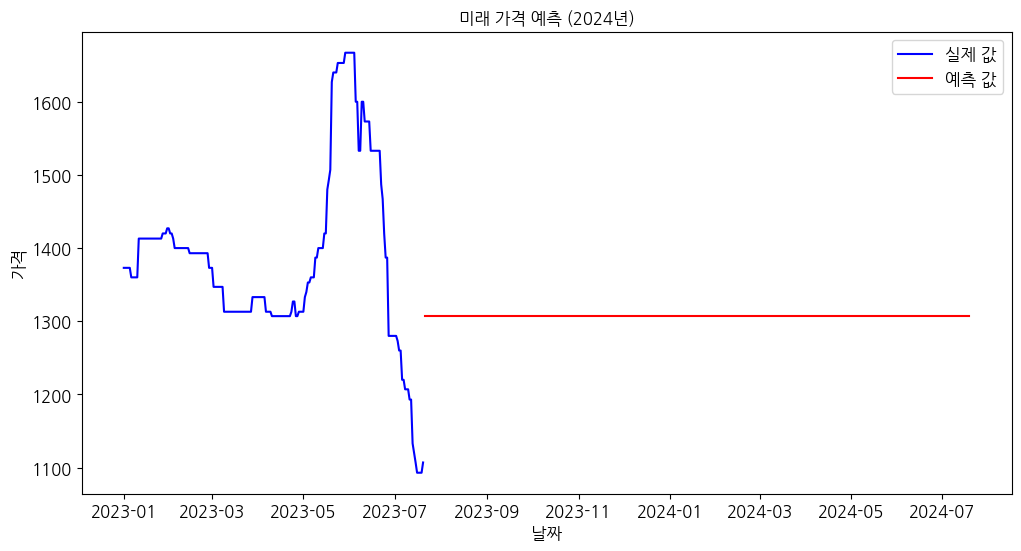

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

# 업로드한 폰트 파일 경로 (로컬 환경에 맞게 수정)
font_path = '/content/NanumGothic-Regular.ttf'

# FontProperties 객체 생성
fontprop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib 설정
plt.rc('font', family='NanumGothic')  # 전체 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 설정

# 데이터 전처리
new_df = new_df.copy()  # 데이터 프레임 복사

# 이동 평균 피처 생성
new_df['lag_1'] = new_df['price'].shift(1)
new_df['lag_2'] = new_df['price'].shift(2)
new_df['lag_3'] = new_df['price'].shift(3)

# NaN 값을 포함한 행 삭제 (이동으로 인한 결측치 제거)
new_df.dropna(inplace=True)

# 입력 변수(X)와 타겟 변수(y) 정의
X = new_df[['lag_1', 'lag_2', 'lag_3']]
y = new_df['price']

# 데이터 분할 (훈련 데이터와 테스트 데이터로 분리, 시계열 데이터이므로 shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# XGBoost 모델 학습
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# 예측값 시각화
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='실제 값', color='blue')
plt.plot(y_test.index, y_pred, label='예측 값', color='red')
plt.xlabel('날짜', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.title('양파 실제 값 vs 예측 값', fontproperties=fontprop)
plt.legend(prop=fontprop)  # 범례에 폰트 적용
plt.xticks(fontproperties=fontprop)  # x축 레이블에 폰트 적용
plt.yticks(fontproperties=fontprop)  # y축 레이블에 폰트 적용
plt.show()

# 날짜 인덱스가 아닌 경우 날짜 인덱스 설정
if not pd.api.types.is_datetime64_any_dtype(new_df.index):
    new_df.index = pd.date_range(start='2023-01-01', periods=len(new_df), freq='D')  # 예시 날짜, 실제 데이터에 맞게 수정

# 미래 값 예측 (단일 예측)
future = pd.DataFrame({
    'lag_1': [new_df['price'].iloc[-1]],
    'lag_2': [new_df['price'].iloc[-2]],
    'lag_3': [new_df['price'].iloc[-3]],
})

future_pred = model.predict(future)
print(f"예측된 미래 값: {future_pred[0]}")

# 미래 값 예측 (다중 예측)
num_future_days = 365  # 예: 2024년 전체를 예측한다고 가정
predicted_prices = []
last_known_data = new_df[['price', 'lag_1', 'lag_2', 'lag_3']].iloc[-1].copy()

for _ in range(num_future_days):
    future_input = last_known_data[['lag_1', 'lag_2', 'lag_3']].values.reshape(1, -1)
    future_price = model.predict(future_input)[0]
    predicted_prices.append(future_price)

    # Update last_known_data for the next prediction
    last_known_data['lag_3'] = last_known_data['lag_2']
    last_known_data['lag_2'] = last_known_data['lag_1']
    last_known_data['lag_1'] = future_price
    last_known_data['price'] = future_price

# 미래 날짜 생성
future_dates = pd.date_range(start=new_df.index[-1] + pd.Timedelta(days=1), periods=num_future_days)

# 미래 값 시각화
plt.figure(figsize=(12,6))
plt.plot(new_df.index, new_df['price'], label='실제 값', color='blue')
plt.plot(future_dates, predicted_prices, label='예측 값', color='red')
plt.xlabel('날짜', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.title('미래 가격 예측 (2024년)', fontproperties=fontprop)
plt.legend(prop=fontprop)  # 범례에 폰트 적용
plt.xticks(fontproperties=fontprop)  # x축 레이블에 폰트 적용
plt.yticks(fontproperties=fontprop)  # y축 레이블에 폰트 적용
plt.show()

In [16]:
new_df

,itemname,kindname,countyname,marketname,price,date,lag_1,lag_2,lag_3
2023-01-01,양파,양파(1kg),대구,북부도매,1373.0,2023-08-21,1373.0,1387.0,1387.0
2023-01-02,양파,양파(1kg),대구,북부도매,1373.0,2023-08-22,1373.0,1373.0,1387.0
2023-01-03,양파,양파(1kg),대구,북부도매,1373.0,2023-08-23,1373.0,1373.0,1373.0
2023-01-04,양파,양파(1kg),대구,북부도매,1373.0,2023-08-24,1373.0,1373.0,1373.0
2023-01-05,양파,양파(1kg),대구,북부도매,1373.0,2023-08-25,1373.0,1373.0,1373.0
2023-01-06,양파,양파(1kg),대구,북부도매,1360.0,2023-08-28,1373.0,1373.0,1373.0
2023-01-07,양파,양파(1kg),대구,북부도매,1360.0,2023-08-29,1360.0,1373.0,1373.0
2023-01-08,양파,양파(1kg),대구,북부도매,1360.0,2023-08-30,1360.0,1360.0,1373.0
2023-01-09,양파,양파(1kg),대구,북부도매,1360.0,2023-08-31,1360.0,1360.0,1360.0
2023-01-10,양파,양파(1kg),대구,북부도매,1360.0,2023-09-01,1360.0,1360.0,1360.0


### 모델링

In [17]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

시계열 데이터 처리

In [18]:
# 시간 정보 처리
new_df['date'] = pd.to_datetime(new_df['date'])
new_df = new_df.set_index('date')

# 과거 가격 데이터 생성 (lag 변수)
for i in range(1, 4):
    x = new_df[f'lag_{i}'] = new_df['price'].shift(i)

# 훈련/테스트 데이터 분할
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

최적의 하이퍼파라미터를 찾기 위해 그리드서치 진행

In [19]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.2]
}

# XGBoost 모델 생성
model = XGBRegressor(objective='reg:squarederror')

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

# 학습 및 최적 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print('Best Parameters:', grid_search.best_params_)

# 테스트 데이터로 모델 평가
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
MSE: 17624.7705
MAE: 114.9808


Best Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
MSE: 11775.1451
MAE: 86.0267
R-squared: 0.5806


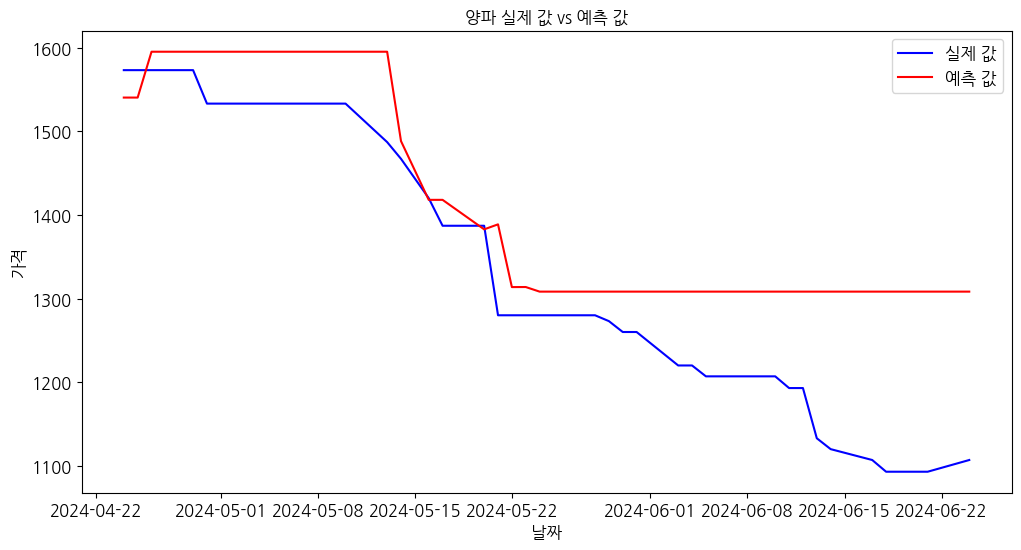

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

# 업로드한 폰트 파일 경로 (로컬 환경에 맞게 수정)
font_path = '/content/NanumGothic-Regular.ttf'

# FontProperties 객체 생성
fontprop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib 설정
plt.rc('font', family='NanumGothic')  # 전체 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 설정

# 데이터 전처리
new_df = new_df.copy()  # 데이터 프레임 복사

# 이동 평균 피처 생성
new_df['lag_1'] = new_df['price'].shift(1)
new_df['lag_2'] = new_df['price'].shift(2)
new_df['lag_3'] = new_df['price'].shift(3)

# NaN 값을 포함한 행 삭제 (이동으로 인한 결측치 제거)
new_df.dropna(inplace=True)

# 입력 변수(X)와 타겟 변수(y) 정의
X = new_df[['lag_1', 'lag_2', 'lag_3']]
y = new_df['price']

# 데이터 분할 (훈련 데이터와 테스트 데이터로 분리, 시계열 데이터이므로 shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.2]
}

# XGBoost 모델 생성
model = XGBRegressor(objective='reg:squarederror')

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

# 학습 및 최적 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print('Best Parameters:', grid_search.best_params_)

# 테스트 데이터로 예측 수행
y_pred = grid_search.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

# 예측값 시각화
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='실제 값', color='blue')
plt.plot(y_test.index, y_pred, label='예측 값', color='red')
plt.xlabel('날짜', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.title('양파 실제 값 vs 예측 값', fontproperties=fontprop)
plt.legend(prop=fontprop)  # 범례에 폰트 적용
plt.xticks(fontproperties=fontprop)  # x축 레이블에 폰트 적용
plt.yticks(fontproperties=fontprop)  # y축 레이블에 폰트 적용
plt.show()